# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 3. Сравнение оценок и эффективные оценки
### Дедлайн --- 2 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 15 баллов**.

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, лапласа и коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [2]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)
#YOUR CODE GOES HERE

norm_sample = norm_distr.rvs(size=N)
laplacian_sample = laplacian_distr.rvs(size=N)
cauchy_sample = cauchy_distr.rvs(size=N)


print ("norm sample: ", norm_sample.mean(), norm_sample.std())
print ("laplacian sample: ", laplacian_sample.mean(), laplacian_sample.std())
print ("cauchy sample: ", cauchy_sample.mean(), cauchy_sample.std())

norm sample:  -0.03221981671047769 1.0040273662457924
laplacian sample:  -0.07008998840312412 1.3506272000711381
cauchy sample:  10.70126521567635 229.5805126153313


Постройте график плотности распределения для всех трех распределений на одних осях.

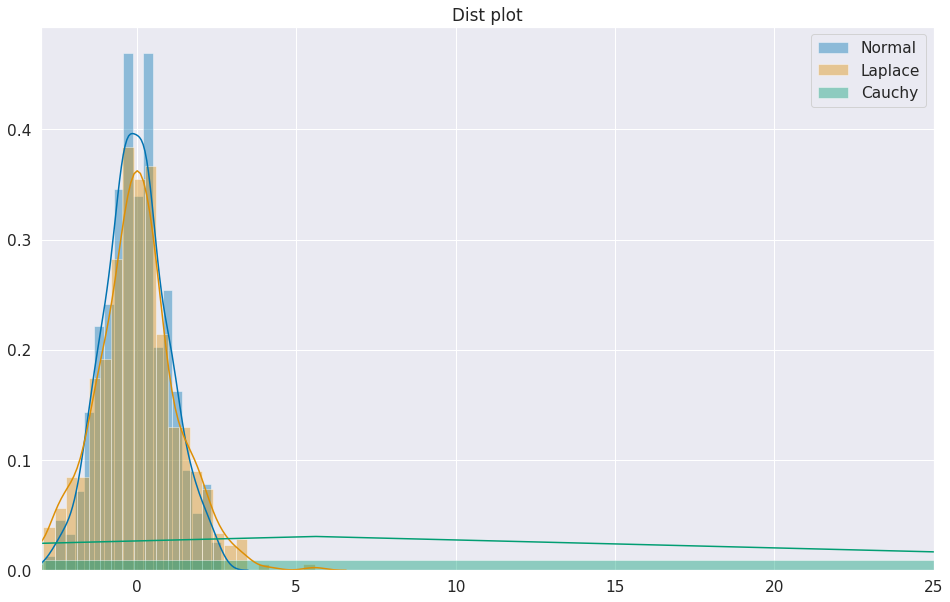

In [3]:
#YOUR CODE GOES HERE
plt.figure(figsize=(16, 10))

sns.distplot(norm_sample, color=color_for_normal, label="Normal")
sns.distplot(laplacian_sample, color=color_for_laplace, label="Laplace")
sns.distplot(cauchy_sample, color=color_for_cauchy, label="Cauchy")

plt.xlim(-3, 25)
plt.legend()
plt.title("Dist plot")
plt.show()

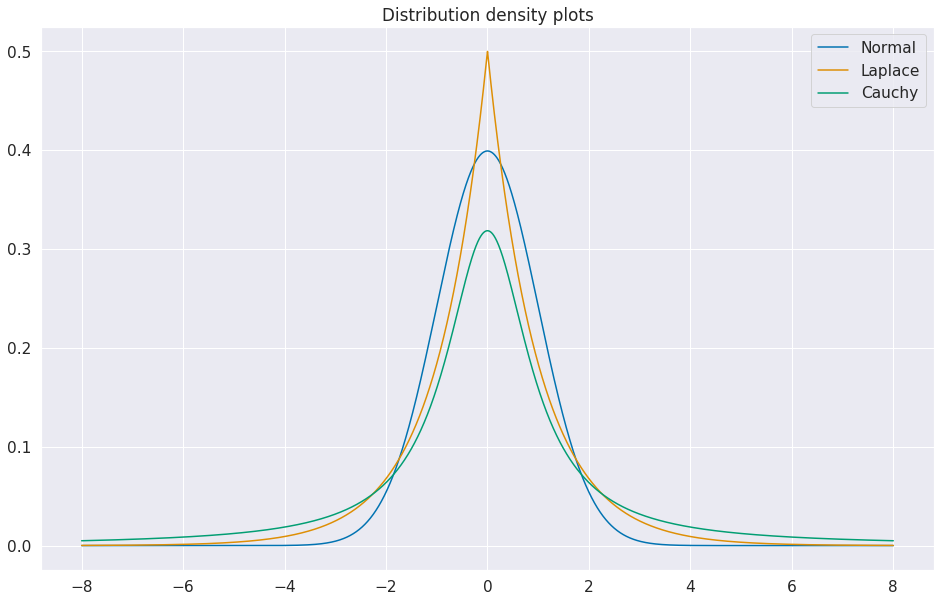

In [31]:
plt.figure(figsize=(16, 10))
x = np.linspace(-8, 8, 10000, endpoint=True)

plt.plot(x, norm_distr.pdf(x), color=color_for_normal, label="Normal")
plt.plot(x, laplacian_distr.pdf(x), color=color_for_laplace, label="Laplace")
plt.plot(x, cauchy_distr.pdf(x), color=color_for_cauchy, label="Cauchy")

plt.legend()
plt.title("Distribution density plots")
plt.show()

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** Математическое ожидание по выборке = $ \overline{X} $.

Выборочное среднее чувствительно к выбросам, поэтому сложнее всего будет оценить мат ожидание по выборке для распределения Коши, т.к. у него "тяжелые" хвосты  

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [4]:
import math

def truncated_mean(sample, alpha=0.3):
    #YOUR CODE GOES HERE
    assert len(sample) != 0
    assert alpha > 0 and alpha < 0.5
    
    if len(sample) <= 2:
        return np.mean(sample)
    else:
        return np.mean(np.sort(sample)[round(alpha*len(sample)):round(-alpha*len(sample))])

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [5]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    #YOUR CODE GOES HERE
    x2_pdf = lambda x : x**2 * distr.pdf(x)
    u = distr.ppf(1-alpha)
    integral = quad(x2_pdf, 0, u)[0]
    
    return 2 * (integral + alpha * u**2) / (1-2*alpha)**2

Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

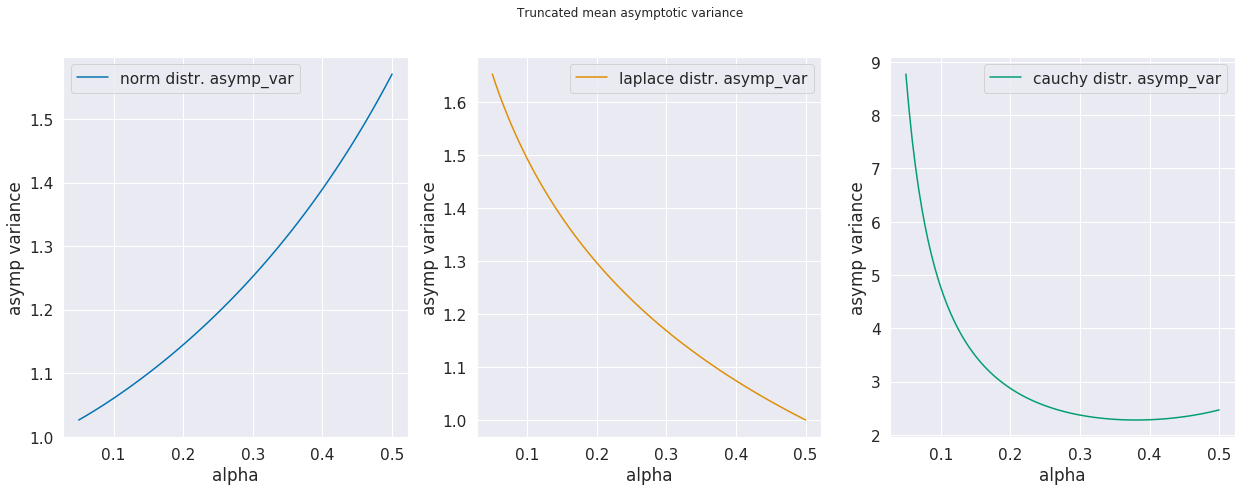

argmin[cauchy_asymp_var]:  0.3818108080808081


In [6]:
alpha_grid = np.linspace(0.05, 0.49999, 100)

fig, axis = plt.subplots(1, 3, figsize=(21,7))
fig.suptitle("Truncated mean asymptotic variance")

for ax in axis:
    ax.set_xlabel("alpha")
    ax.set_ylabel("asymp variance")

norm_asymp_var = np.array([asymp_var(norm_distr, alpha) for alpha in alpha_grid])
axis[0].plot(alpha_grid, norm_asymp_var, color=color_for_normal, label="norm distr. asymp_var")
axis[0].legend()

laplacian_asymp_var = np.array([asymp_var(laplacian_distr, alpha) for alpha in alpha_grid])
axis[1].plot(alpha_grid, laplacian_asymp_var, color=color_for_laplace, label="laplace distr. asymp_var")
axis[1].legend()

cauchy_asymp_var = np.array([asymp_var(cauchy_distr, alpha) for alpha in alpha_grid])
axis[2].plot(alpha_grid, cauchy_asymp_var, color=color_for_cauchy, label="cauchy distr. asymp_var")
axis[2].legend()

plt.show()

print("argmin[cauchy_asymp_var]: ", alpha_grid[cauchy_asymp_var.argmin()])
#YOUR CODE GOES HERE

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:**

Усеченное среднее порядка 0.5 это **медиана** , а порядка 0 -- **среднее**

Видим что у нормального распределения график возрастает , а у двух других убывает. Это можно объяснить тем , что у нормального распределения самые легкие хвосты: 

$$
pdf_{norm} \sim e^{-x^2}
~\
pdf_{laplace} \sim e^{-x}
~\
pdf_{cauchy} \sim \frac{1}{x^2}
$$

поэтому у него вероятность выбросов (отклонения в 3$\sigma$) мала по сравнению с другими двумя распределениями. Среднее значение сильно реагирует на выбросы, и если они маловероятны то асимптотическая дисперсия будет маленькой (в случае нормального распределения даже меньше асимпт. дисперсии медианы). Также видим что самое большое значение асимптотической дисперсии среднего у распределения Коши

Асимптотическая дисперсия достигает минимума в:

- Нормальное $\alpha = 0$ (среднее)
- Лапласа $\alpha = 0.5$ (медиана)
- Коши $\alpha = 0.38$

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [7]:
#YOUR CODE GOES HERE
def CalcMedians(sample):
    return np.array([np.median(sample[:i]) for i in range(1, len(sample)+1)])

def CalcMeans(sample):
    return np.cumsum(sample) / len(sample)

def CalcTruncMeans(sample, alpha=0.35):
    return np.array([truncated_mean(sample[:i], alpha) for i in range(1, len(sample)+1)])

norm_medians = CalcMedians(norm_sample)
norm_means = CalcMeans(norm_sample)
norm_truncs = CalcTruncMeans(norm_sample)

laplacian_medians = CalcMedians(laplacian_sample)
laplacian_means = CalcMeans(laplacian_sample)
laplacian_truncs = CalcTruncMeans(laplacian_sample)

cauchy_medians = CalcMedians(cauchy_sample)
cauchy_means = CalcMeans(cauchy_sample)
cauchy_truncs = CalcTruncMeans(cauchy_sample)

Ns = np.arange(1, N+1)

**Нормальное распределение**

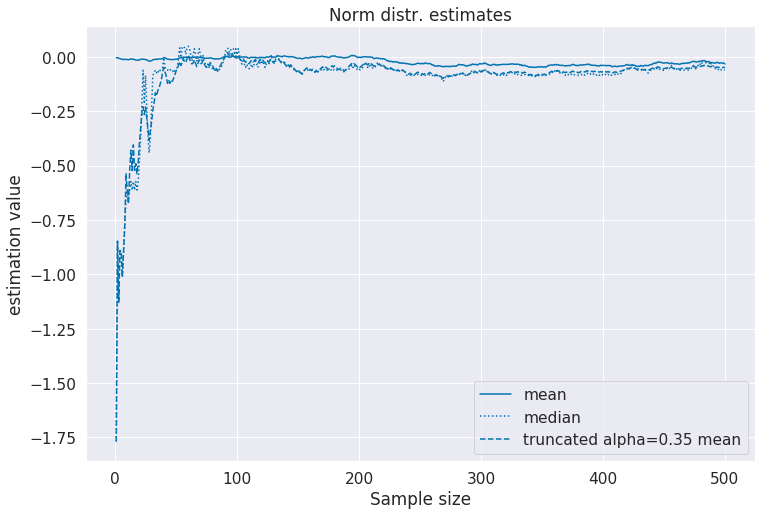

In [8]:
#YOUR CODE GOES HERE
plt.figure(figsize=(12, 8))
plt.plot(Ns, norm_means, color=color_for_normal, label="mean")
plt.plot(Ns, norm_medians, ":", color=color_for_normal, label="median")
plt.plot(Ns, norm_truncs, "--", color=color_for_normal, label="truncated alpha=0.35 mean")

plt.xlabel("Sample size")
plt.ylabel("estimation value")
plt.legend()
plt.title("Norm distr. estimates")

plt.show()

**Распределение Лапласа**

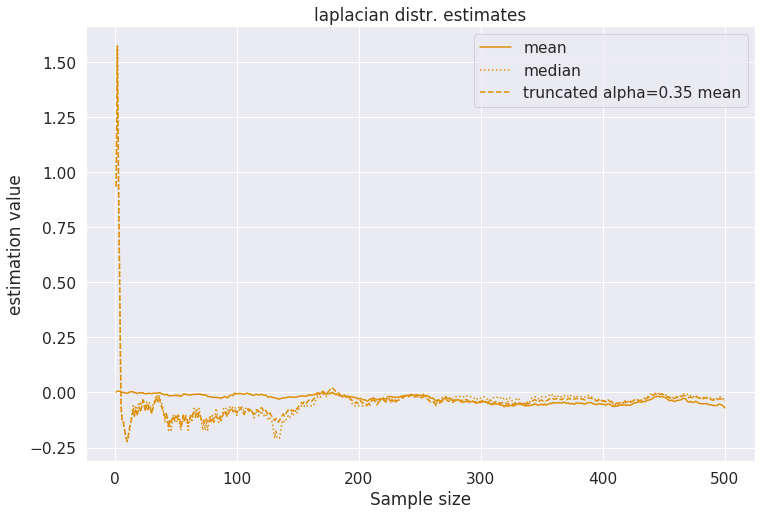

In [9]:
#YOUR CODE GOES HERE
plt.figure(figsize=(12, 8))
plt.plot(Ns, laplacian_means, color=color_for_laplace, label="mean")
plt.plot(Ns, laplacian_medians, ":", color=color_for_laplace, label="median")
plt.plot(Ns, laplacian_truncs, "--", color=color_for_laplace, label="truncated alpha=0.35 mean")

plt.xlabel("Sample size")
plt.ylabel("estimation value")
plt.legend()
plt.title("laplacian distr. estimates")

plt.show()

**Распределение Коши**

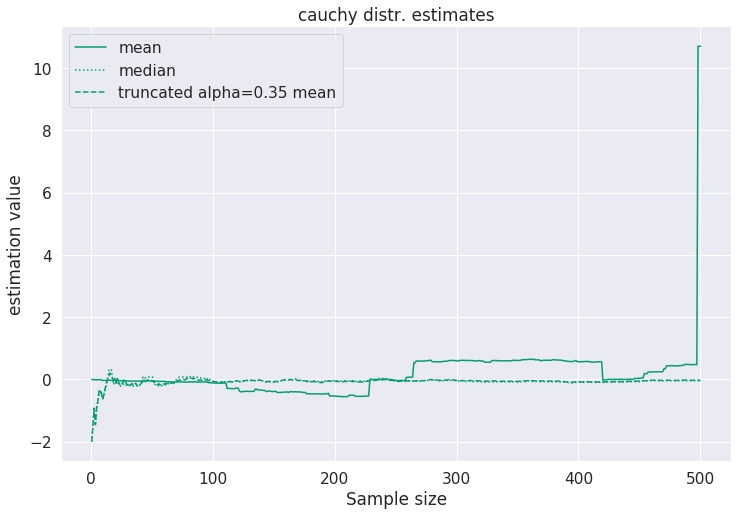

In [10]:
#YOUR CODE GOES HERE
plt.figure(figsize=(12, 8))
plt.plot(Ns, cauchy_means, color=color_for_cauchy, label="mean")
plt.plot(Ns, cauchy_medians, ":", color=color_for_cauchy, label="median")
plt.plot(Ns, cauchy_truncs, "--", color=color_for_cauchy, label="truncated alpha=0.35 mean")

plt.xlabel("Sample size")
plt.ylabel("estimation value")
plt.legend()
plt.title("cauchy distr. estimates")

plt.show()

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:**
- Из графиков видно что наименьшая дисперсия у среднего только для нормального распределения
- Видим что дисперсия среднего значения самая большая у распределения коши, у которого при $N\approx500$ есть выброс

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [11]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /home/archie/matstat_prac/Task3/winequality-red.csv
100%|████████████████████████████████████████| 101k/101k [00:00<00:00, 1.85MB/s]


In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("winequality-red.csv")

In [14]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [15]:
#YOUR CODE GOES HERE
if "category" not in data.columns:
    data["category"] = ["low alcohol" if x <= 10 else
                        "medium alcohol" if (x > 10) and (x <= 12) else
                        "high alcohol" if x > 12 else "" for x in data["alcohol"]]
    
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low alcohol
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low alcohol
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low alcohol
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,low alcohol
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low alcohol
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium alcohol
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium alcohol
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium alcohol
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [16]:
#YOUR CODE GOES HERE
indices = ["low alcohol", "medium alcohol", "high alcohol"]

means = [np.mean(data.loc[data.loc[:, "category"] == index, "residual sugar"]) for index in indices]
medians = [np.median(data.loc[data.loc[:, "category"] == index, "residual sugar"]) for index in indices]

sugar_stats_data = pd.DataFrame({ "mean" : means, 
                                  "median" : medians}, index=indices)

print("mean residual sugar", np.mean(data.loc[:, "residual sugar"]))
print("median residual sugar", np.median(data.loc[:, "residual sugar"]))
                                              
sugar_stats_data

mean residual sugar 2.5388055034396517
median residual sugar 2.2


,mean,median
low alcohol,2.445984,2.1
medium alcohol,2.592264,2.2
high alcohol,2.760993,2.3


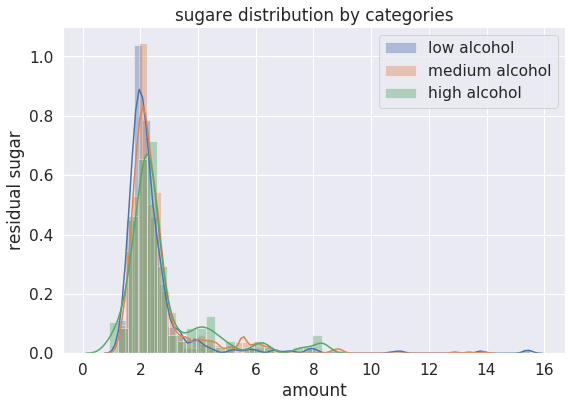

In [17]:
plt.figure(figsize=(9, 6))

for index in indices:
    sns.distplot(data.loc[data.loc[:, "category"] == index, "residual sugar"], label=index)

plt.xlabel("amount")
plt.ylabel("residual sugar")
plt.legend()
plt.title("sugare distribution by categories")
plt.show()

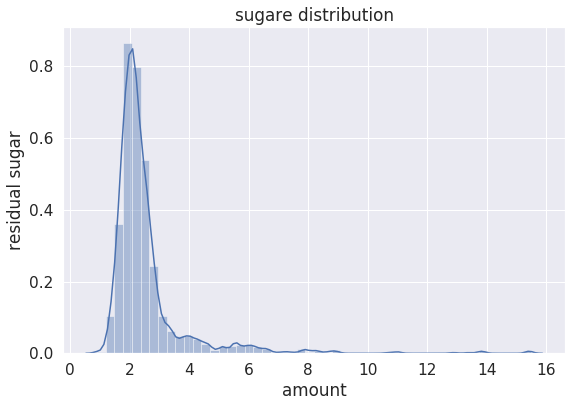

In [18]:
plt.figure(figsize=(9, 6))

sns.distplot(data.loc[:, "residual sugar"])

plt.xlabel("amount")
plt.ylabel("residual sugar")
plt.title("sugare distribution")
plt.show()

Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:**

С увеличением алкогольности, растет среднее значение и медиана остаточного алкоголя, а также растет число выбросов. Медиана остаточного сахара в целом совпадает с медианой остаточного сахара для `medium alcohol`, а среднее значение чуть меньше

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

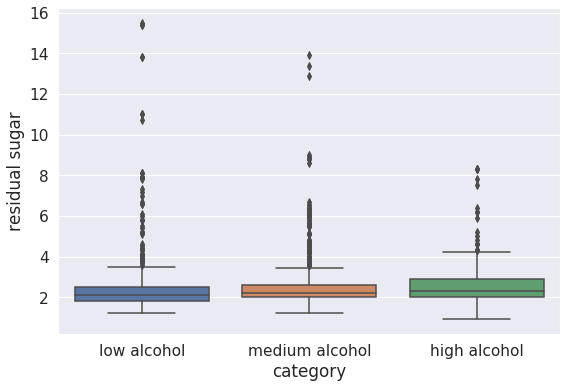

In [19]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
#YOUR CODE GOES HERE

plt.figure(figsize(9, 6))
sns.boxplot(y="residual sugar", x="category", data=data)
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:**
- Видим, что медиана (*черта внтури усов*) растет с увеличением кол-ва алкоголя
- Лучше брать медиану, тк в выборке много выбросов (*точки вне усов на боксплоте*)

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

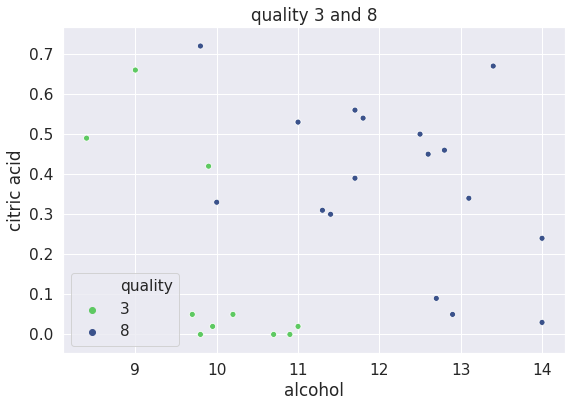

In [20]:
#YOUR CODE GOES HERE
plt.figure(figsize=(9, 6))
sns.scatterplot(data=data.loc[(data.loc[:, "quality"] == 3) | (data.loc[:, "quality"] == 8), :],
                x="alcohol",
                y="citric acid",
                hue="quality",
                palette=[palette[0]]+[palette[-1]])
plt.xlabel("alcohol")
plt.ylabel("citric acid")
plt.title("quality 3 and 8")
plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

**ОМП для многомерного нормального распределения**

$$
\hat{\mu} = \overline{X}
$$

$$
\hat{\Sigma} = \overline{(X-\hat{\mu})(X-\hat{\mu})^{T}}
$$

In [21]:
#YOUR CODE GOES HERE
low_quality_data = data.loc[data.loc[:, "quality"] == 3, ["alcohol", "citric acid"]].values
high_quality_data = data.loc[data.loc[:, "quality"] == 8, ["alcohol", "citric acid"]].values

def NormMLE(X):
    # X matrix shape: (n_objects, n_features)
    mu = X.mean(axis=0)
    sigma = np.cov(X.T)
    
    return mu, sigma

mu_low_quality, sigma_low_quality = NormMLE(low_quality_data)
print("mu and sigma for low quality wine \n", mu_low_quality, "\n", sigma_low_quality)

mu_high_quality, sigma_high_quality = NormMLE(high_quality_data)
print("mu and sigma for high quality wine \n", mu_high_quality, "\n", sigma_high_quality)

mu and sigma for low quality wine 
 [9.955 0.171] 
 [[ 0.66913889 -0.15500556]
 [-0.15500556  0.06283222]]
mu and sigma for high quality wine 
 [12.09444444  0.39111111] 
 [[ 1.49820261 -0.11240523]
 [-0.11240523  0.03981046]]


Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [22]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

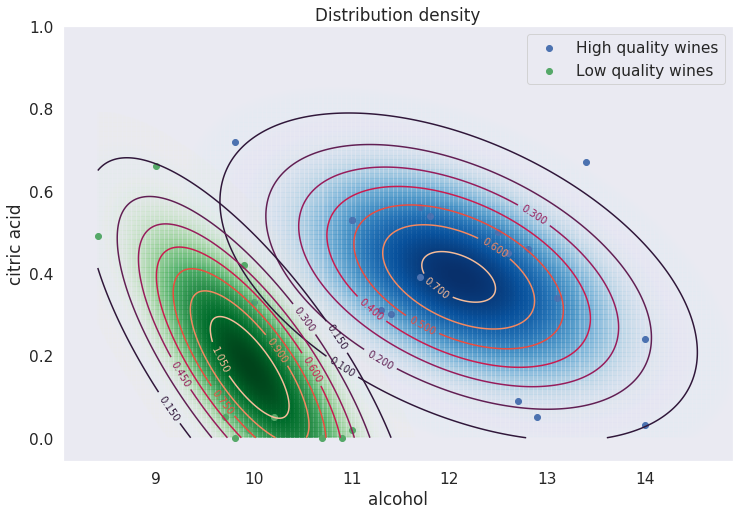

In [23]:
dots_num = 500

y = np.linspace(data["citric acid"].min(), data["citric acid"].max(), dots_num, endpoint=True)
x = np.linspace(data["alcohol"].min(), data["alcohol"].max(), dots_num, endpoint=True)
grid = np.stack(np.meshgrid(x, y), axis=2)
plt.figure(figsize=(12, 8))

# high quality
plt.pcolormesh(
    x, 
    y, 
    sps.multivariate_normal.pdf(grid, mean=mu_high_quality, cov=sigma_high_quality), 
    cmap=get_density_cmap("Blues"),
    label="High quality wines"
)

CS = plt.contour(
    x, 
    y, 
    sps.multivariate_normal.pdf(grid, mean=mu_high_quality, cov=sigma_high_quality)
)

plt.clabel(
    CS,
    inline=1
)

plt.scatter(
    data=data[data["quality"] == 8], 
    x="alcohol", 
    y="citric acid", 
    label="High quality wines",
    c="b"
)

# low quality
plt.pcolormesh(
    x, 
    y, 
    sps.multivariate_normal.pdf(grid, mean=mu_low_quality, cov=sigma_low_quality), 
    cmap=get_density_cmap("Greens"),
    label="Low quality wines"
)

CS = plt.contour(
    x, 
    y, 
    sps.multivariate_normal.pdf(grid, mean=mu_low_quality, cov=sigma_low_quality)
)

plt.clabel(
    CS,
    inline=1
)

plt.scatter(
    data=data[data["quality"] == 3], 
    x="alcohol", 
    y="citric acid", 
    label="Low quality wines",
    c="g"
)


plt.title("Distribution density")
plt.xlabel("alcohol")
plt.ylabel("citric acid")
plt.legend()
plt.show()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:**
- В среднем алкогольность и содержание лимонной кислоты у вина лучшего качества выше
- Дисперсия по алкогольности у вина высокго качества больше
- Дисперсия по содержанию лимонной кислоты у вина низкого качества выше

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in
    [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
    произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

**Нер-во Крамера-Рао:**

$$
D _{\theta} \theta^{\ast} \geq \frac{(\tau^{'}(\theta))^2}{ni(\theta)}
$$

Из критерия эффективности (расписывая вклад) можно получить, что $i(\theta) = \frac{1}{\theta(1-\theta)}$

поэтому для оценки $\theta$ нижнее значение дисперсии:

$$
\frac{\theta(1-\theta)}{n}
$$

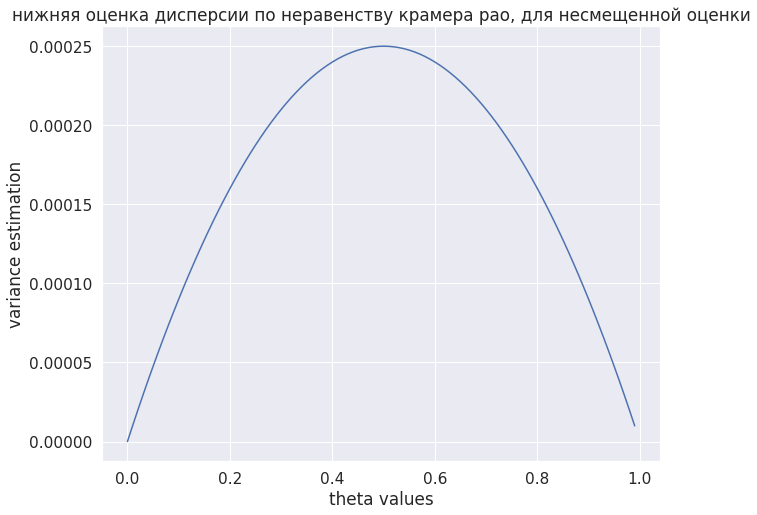

In [24]:
thetas = np.arange(0, 1, 0.01)
n = 1000

plt.figure(figsize=(10, 8))
plt.plot(thetas, thetas*(1-thetas) / n)
plt.xlabel("theta values")
plt.ylabel("variance estimation")
plt.title("нижняя оценка дисперсии по неравенству крамера рао, для несмещенной оценки")
plt.show()

Какой можно сделать вывод (напишите в комментариях)?

**Вывод** 
- График симметричен отн. 0.5 тк $D _{\theta} \theta^{\ast} = D _{\theta}( 1 - \theta^{\ast})$
- Максимальное значение дисперсии достигается при $\theta = \frac{1}{2}$ тк при данном значении $\theta$ информация фишера выборки минимальна

 Для каждого значения $\theta$
    (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$,
    посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии
    (количество бутстрепных выборок равно $1000$) этой
    эффективной оценки $\theta$.

**Эффективная оценка $\theta$**:
$\overline{X}$ *(из все того же критерия эффективности)*

In [25]:
theta_estimates = np.zeros(len(thetas))
bootstrap_estimates = np.zeros(len(thetas))
bootstrap_std = np.zeros(len(thetas))
n = 1000

for i, theta in enumerate(thetas):
    sample = sps.bernoulli.rvs(theta, size=n)
    estimates = np.array([np.random.choice(sample, size=n).mean() for _ in range(n)])
    
    theta_estimates[i] = sample.mean()
    bootstrap_estimates[i] = estimates.mean()
    bootstrap_std[i] = estimates.std()

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

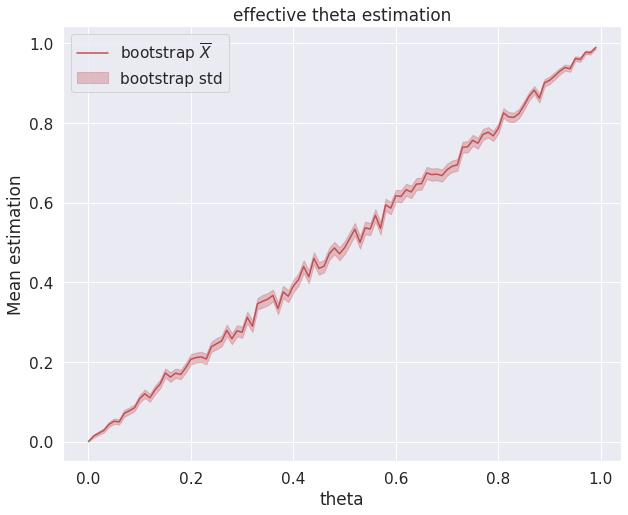

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(thetas, bootstrap_estimates, label="bootstrap $\overline{X}$", color="r")
plt.fill_between(
    x=thetas, 
    y1=bootstrap_estimates + bootstrap_std,
    y2=bootstrap_estimates - bootstrap_std,
    alpha=0.3,
    label="bootstrap std",
    color="r"
)

plt.xlabel("theta")
plt.ylabel("Mean estimation")
plt.title("effective theta estimation")
plt.legend() 

plt.show()

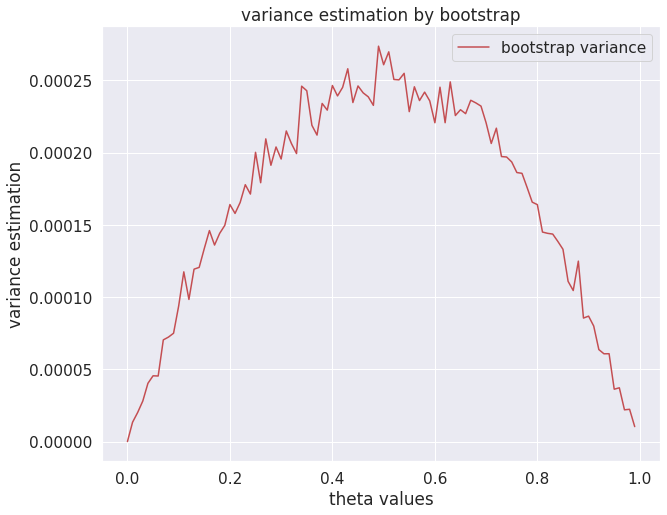

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(thetas, bootstrap_std**2, label="bootstrap variance", color="r")
plt.xlabel("theta values")
plt.ylabel("variance estimation")
plt.title("variance estimation by bootstrap")
plt.legend()
plt.show()

**Вывод**

- График зависимости эффективной оценки $\theta^{\ast} = \overline{X}$ от $\theta$ ожидаемо похож на прямую
- Величина стандартного отклонения увеличивается до $\theta = \frac{1}{2}$, в ней достигает максимума, затем убывает
- График дисперсии оценки, полученной бутстрепом, ожидаемо похож на график нижней оценки дисперсии из нер-ва Крамера-Рао, тк оценка $\theta^{\ast}=\overline{X}$ является эффективной